# Data Summary and Description
Checking the dataset for shape, column names,data types, etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [10]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (891, 12)


In [12]:
print("Data types: \n", df.dtypes)

Data types: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
print("Summary:\n", df.describe(include='all'))

Summary:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket   

# Checking Missing Values

In [9]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


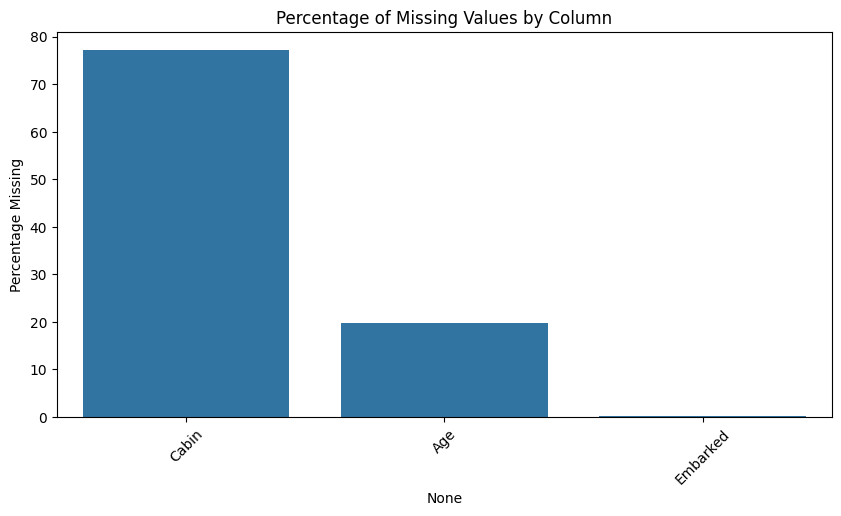

In [ ]:
missVal = df.isnull().sum() / len(df) * 100
missVal = missVal[missVal > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=missVal.index, y=missVal.values)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.show()

Findings:

Cabin has 77.1% missing values (687 of 891)

Age has 19.87% missing values (177 of 891)

Embarked has 0.22% missing values (2 of 891)

# Data distributions and Relationship between variables

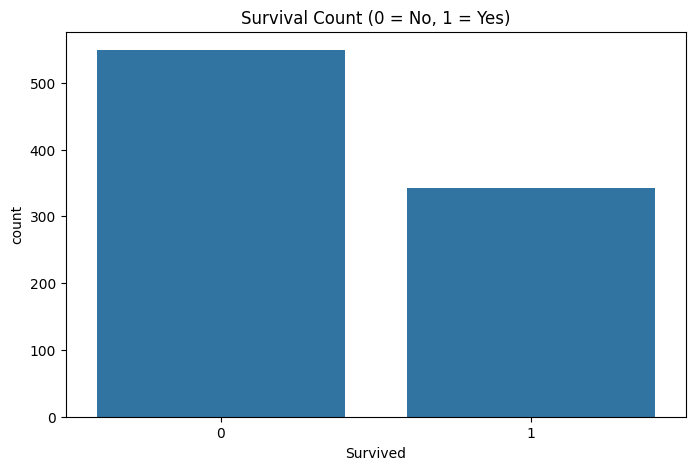

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

print(df['Survived'].value_counts(normalize=True) * 100)

Approximately 38% of passengers in this dataset survived.

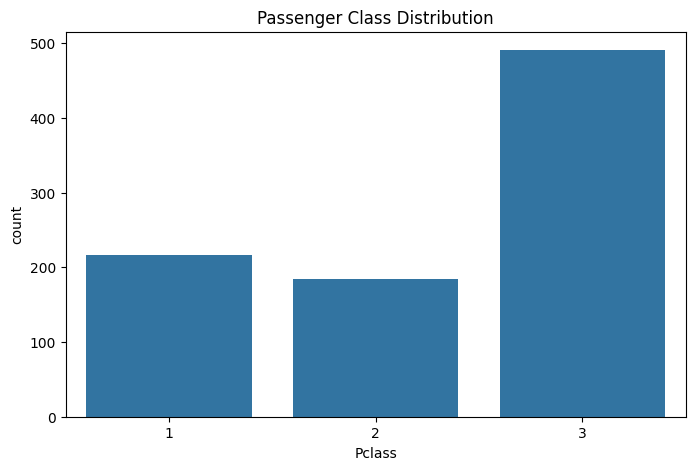

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

print(df['Pclass'].value_counts(normalize=True) * 100)

More than half of passengers were in 3rd class

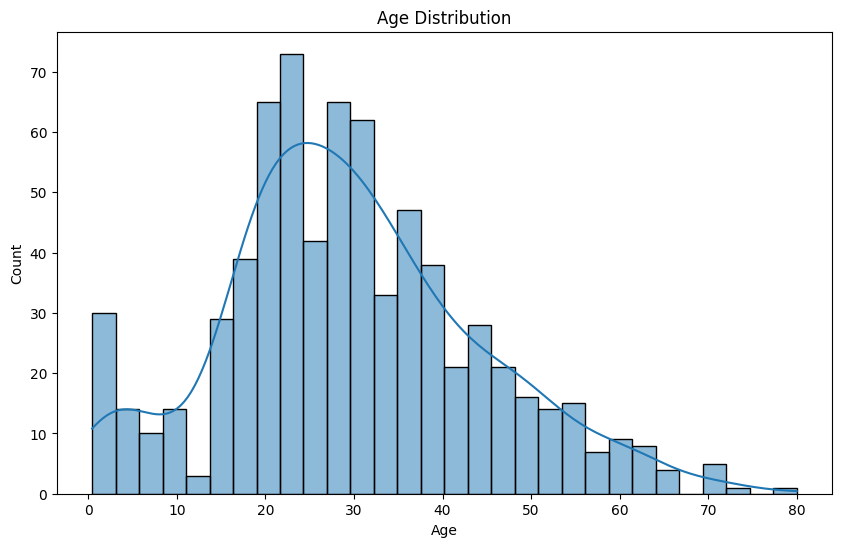

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

print(df['Age'].describe())

Age ranges from 0.42 (infant) to 80 years

Mean age is about 30 years

Distribution is slightly right-skewed meaning positively skewed, most passengers were younger (left side), with fewer older passengers (right tail).

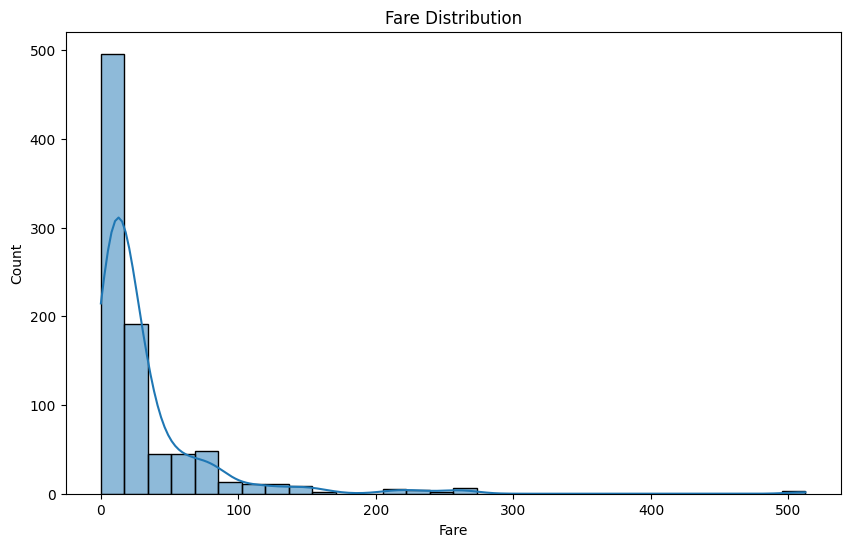

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

print(df['Fare'].describe())

75% of passengers paid $31 or less

Most fares are under $50, but some go up to $512

Highly right-skewed distribution

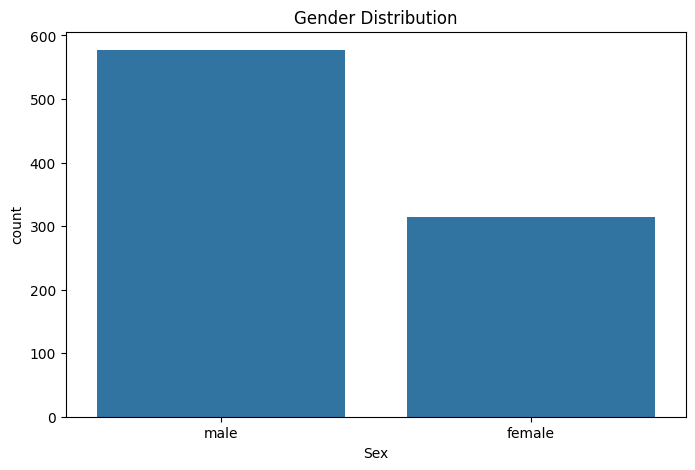

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

print(df['Sex'].value_counts(normalize=True) * 100)

Approx. 65% of passengers were male.

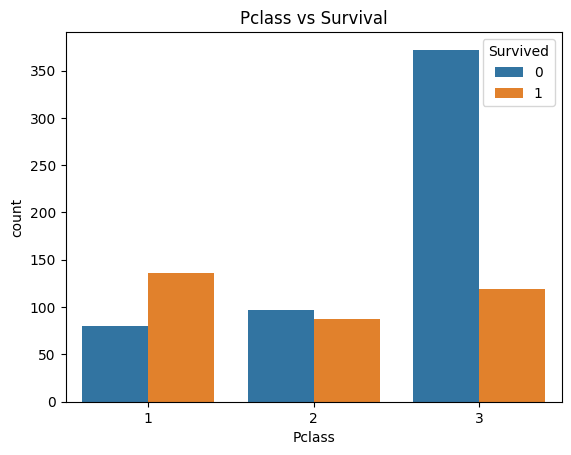

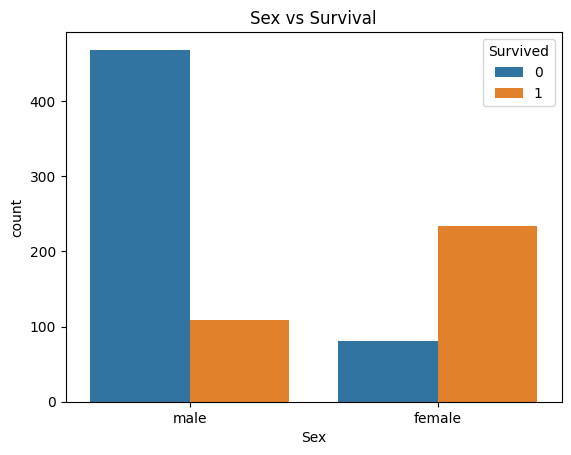

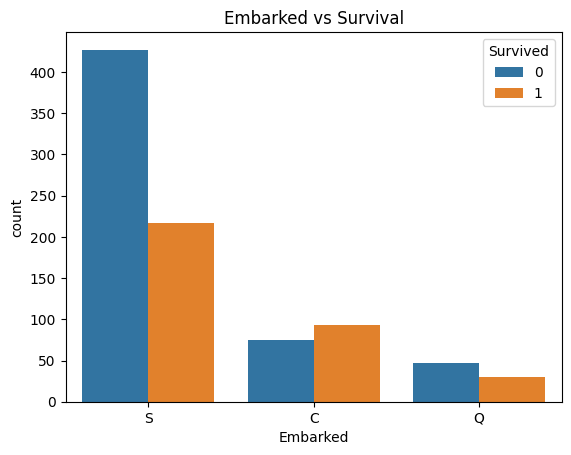

In [ ]:
titles = ['Pclass', 'Sex','Embarked']
for col in titles:
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f"{col} vs Survival")
    plt.show()


Survival rate decreases significantly with passenger class (higher class = better survival).

Females had a much higher survival rate (74% vs 19% for males).

People who embarked their journey from point S has better survival rate.

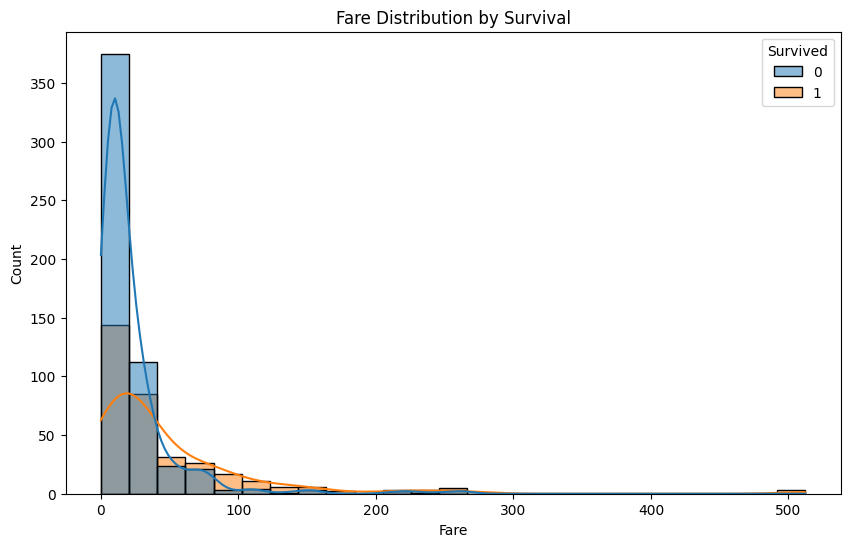

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Fare', hue='Survived',bins=25,kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

Passengers who paid higher fares had a better chance of survival. Higher fares were associated with upper-class cabins, which were closer to lifeboats.

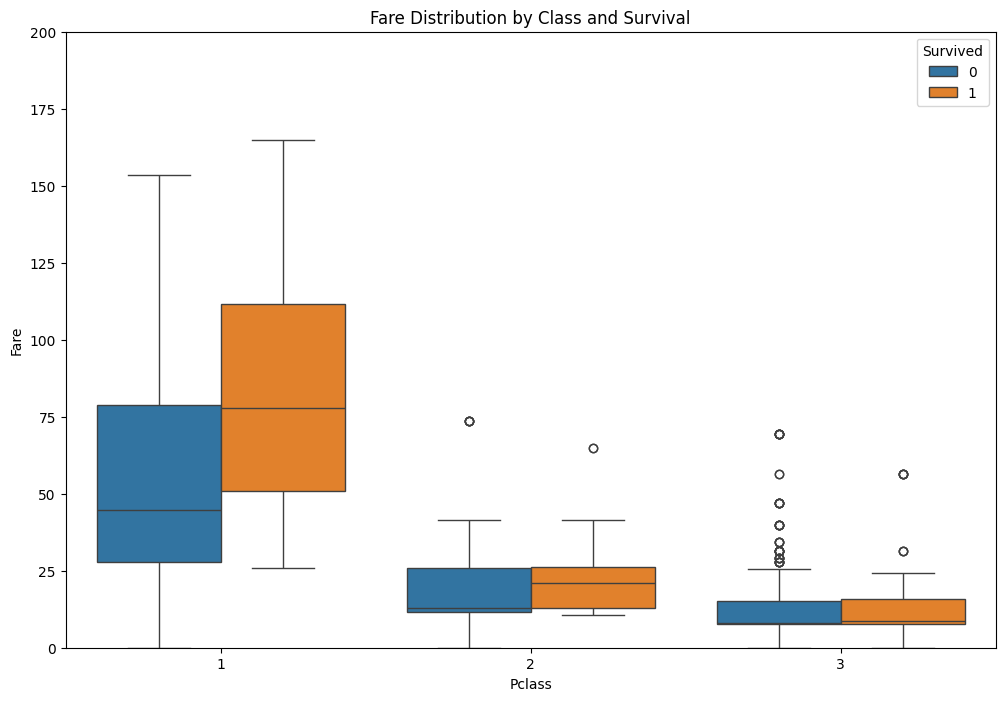

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.ylim(0, 200) 
plt.title('Fare Distribution by Class and Survival')
plt.show()

As Fare is closely tied to passenger class (Pclass):

1st Class: High fares ($30–$512), 62.9% survival rate.

2nd Class: Moderate fares ($13–$26), 47.3% survival rate.

3rd Class: Low fares ($0–$15), 24.2% survival rate.

C:\Users\acer\AppData\Local\Temp\ipykernel_12064\2343649823.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Survival by Age Group:\n", df.groupby('age_group')['Survived'].value_counts())


Survival by Age Group:
 age_group  Survived
Child      1            40
           0            29
Teenager   0            40
           1            30
Adult      0           463
           1           267
Senior     0            17
           1             5
Name: count, dtype: int64


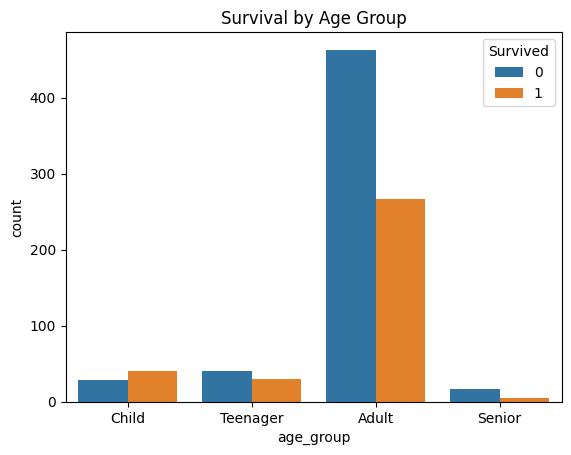

In [64]:
df['age_group'] = pd.cut(df['Age'], bins=[0, 12,18, 60,100], labels=['Child', 'Teenager','Adult','Senior'])
print("Survival by Age Group:\n", df.groupby('age_group')['Survived'].value_counts())
sns.countplot(x='age_group', hue='Survived', data=df)
plt.title('Survival by Age Group')
plt.show()

Children (especially under 10) had higher survival rates

Middle-aged adults (20-40) had lower survival rates

The median age of survivors was slightly lower than non-survivors

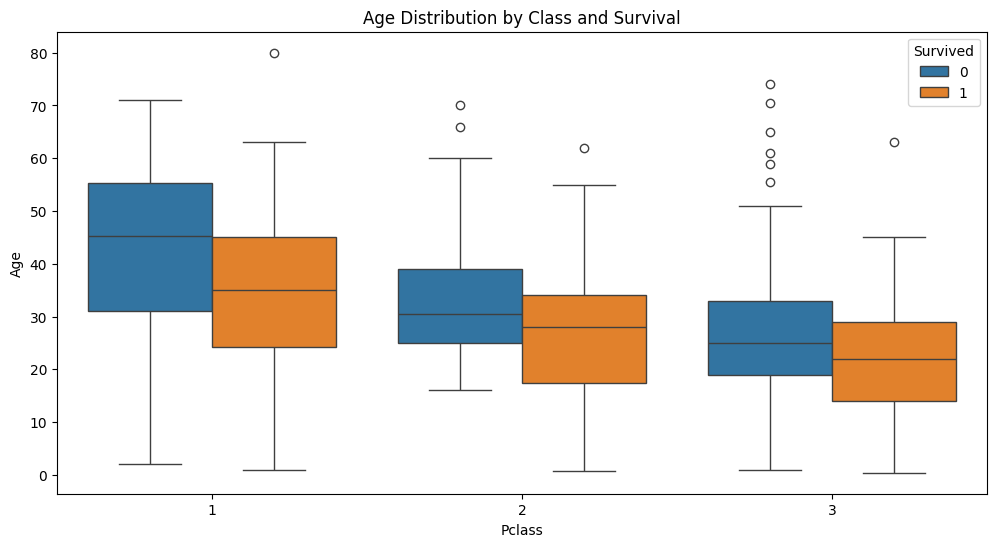

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title("Age Distribution by Class and Survival")
plt.show()

# Outlier Detection

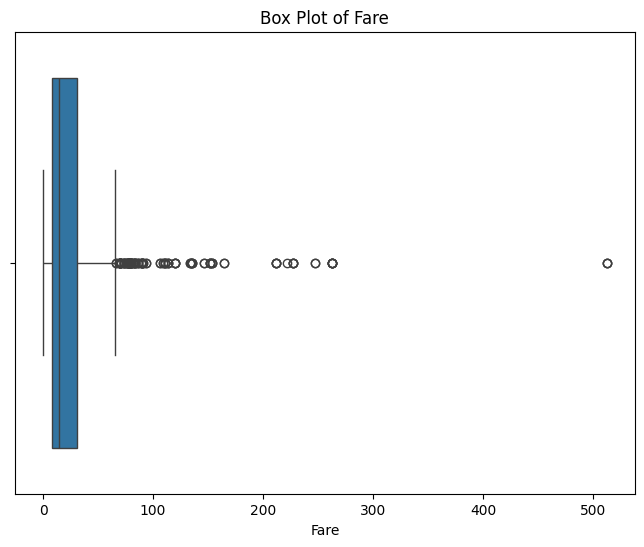

                                   Name  Pclass      Fare        Cabin
258                    Ward, Miss. Anna       1  512.3292          NaN
679  Cardeza, Mr. Thomas Drake Martinez       1  512.3292  B51 B53 B55
737              Lesurer, Mr. Gustave J       1  512.3292         B101


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.show()

maxfares = df[df['Fare'] > 300]
print(maxfares[['Name', 'Pclass', 'Fare', 'Cabin']])

Several passengers paid over $300

These were all first-class passengers with multiple cabins assigned.

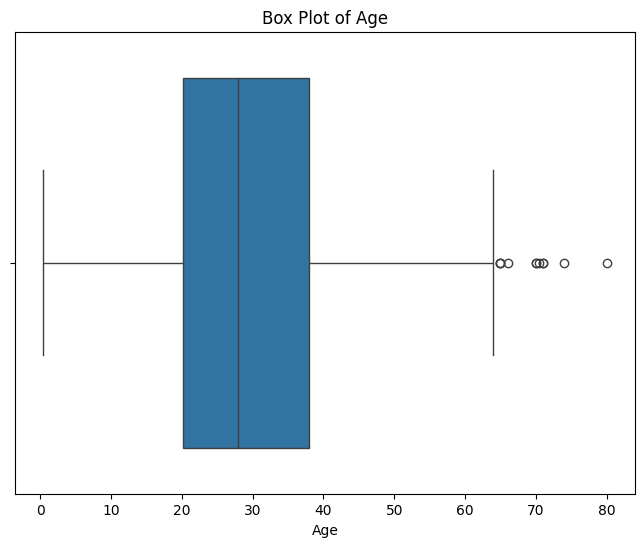

                                     Name   Age  Pclass  Survived
96              Goldschmidt, Mr. George B  71.0       1         0
116                  Connors, Mr. Patrick  70.5       3         0
493               Artagaveytia, Mr. Ramon  71.0       1         0
630  Barkworth, Mr. Algernon Henry Wilson  80.0       1         1
851                   Svensson, Mr. Johan  74.0       3         0


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'].dropna())
plt.title('Box Plot of Age')
plt.show()

old = df[df['Age'] > 70]
print(old[['Name', 'Age', 'Pclass', 'Survived']])

A few passengers were over 70 years old

Most were in first class

Survival rate among these older passengers was not great and low, suggesting less number of survived passengers..

# Correlation Analysis using Heatmap

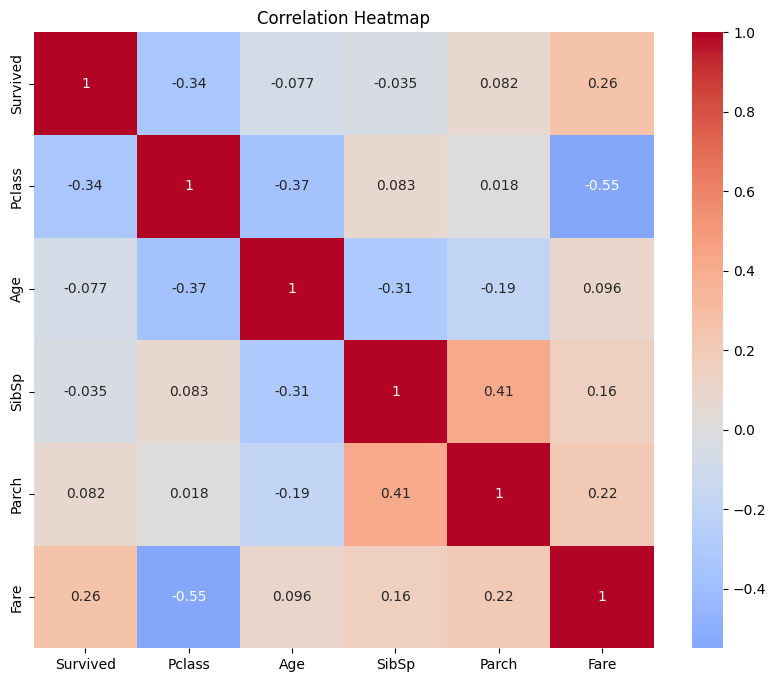

In [ ]:
numerical = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
corr = numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Family size analysis

Text(0.5, 0.98, 'Histograms of Numerical Features')

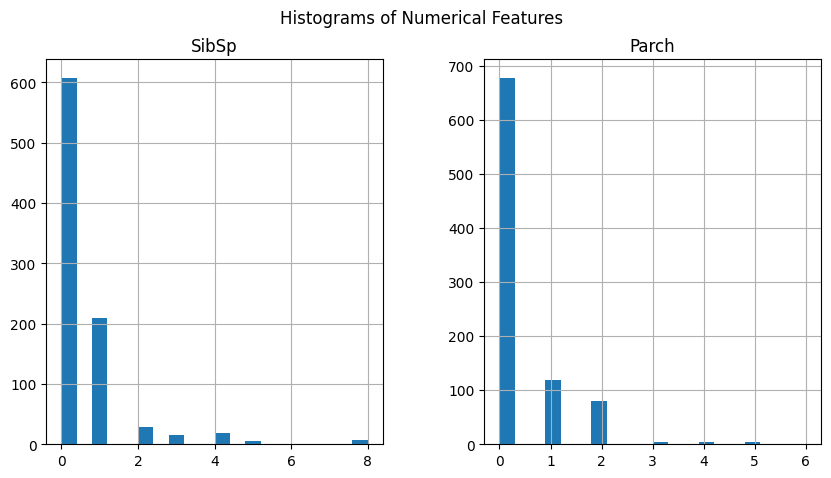

In [65]:
numeric = ['SibSp', 'Parch']

df[numeric].hist(bins=20, figsize=(10, 5))
plt.suptitle("Histograms of Numerical Features")


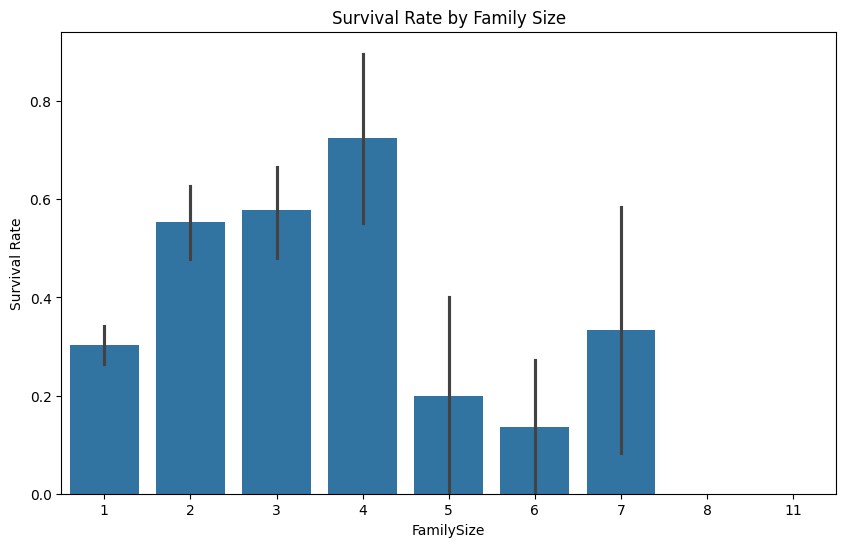

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()

Passengers traveling alone had lower survival rates

Small families (2-4 members) had higher survival rates

Very large families with more than 5 members had lower survival rates

# Thank You!